In [22]:
#https://towardsdatascience.com/the-simplest-data-science-project-using-pandas-matplotlib-9d7042e7ce6f
import googletrans
import pandas as pd
from google_trans_new import google_translator   # Import Translator module from googletrans package
import matplotlib.pyplot as plt; plt.rcdefaults() 

In [3]:
#Read the .csv file and have the data frame format of the file
amazon_df =pd.read_csv("amazon.csv", thousands = '.')
#save a copy of the file for future references
df = amazon_df.copy()

In [4]:
#Dimension of the data
df.shape


(6454, 5)

In [5]:
#top 5 rows of the data
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002


In [6]:
#summary of the data frame
df.describe(include = 'all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,01/01/2016
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [7]:
#To check if missing values are present
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [8]:
import numpy as np
#drop rows where forest fires are 0 (convert 0 to NaN, then drop the rows)
df = df.replace(0, np.nan)
df2 = df.dropna(subset= ['number'])

In [9]:
#updated dataframe
df2.shape

(5837, 5)

In [10]:
df2.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,01/01/2016
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [11]:
#Forest fires per month
forest_fire_per_month = df2.groupby('month')['number'].sum()
print(forest_fire_per_month)

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64


In [12]:
type(forest_fire_per_month)

pandas.core.series.Series

In [13]:
#find the unique months
months_unique = list(df['month'].unique())
print(months_unique)

['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']


In [15]:
#To look at the data in the monthly order
forest_fire_per_month= forest_fire_per_month.reindex(months_unique,axis = 0)
type(forest_fire_per_month)

pandas.core.series.Series

In [16]:
#Convert Series to dataframe
forest_fire_per_month = forest_fire_per_month.to_frame()
type(forest_fire_per_month)

pandas.core.frame.DataFrame

In [37]:
print(forest_fire_per_month)

              number
month               
Janeiro      52587.0
Fevereiro    30952.0
Março        35118.0
Abril        28364.0
Maio         46083.0
Junho       111405.0
Julho       217620.0
Agosto      740841.0
Setembro   1015925.0
Outubro     629665.0
Novembro    312326.0
Dezembro    152596.0


In [27]:
type(months_unique)

list

In [ ]:
#forest_fire_per_month[,:]
forest_fire_per_month = forest_fire_per_month.reset_index()
print(forest_fire_per_month)

In [29]:
!pip install google_trans_new



In [68]:
from google_trans_new import google_translator  


In [69]:
#googletrans (python library that implements google translate API)
translator = google_translator()  
#translator = Translator(service_urls=['translate.googleapis.com'])
#translator = Translator() #create an object of Translator
for month in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)
    print('...')

Exception: 

In [36]:
translator2= google_translator()
for i,m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)
    month1= translated.text
    forest_fire_per_month.at[i, 'month']=month1
print(forest_fire_per_month)

KeyError: 'month'

In [40]:
# Language Translator


translator = google_translator()   # Create object of Translator.

In [43]:
translatedList = translator.translate(['Hello Friends','Welcome on Codeproject',
'Have a good day'])

for translated in translatedList:
    print(translated.origin, '->', translated.text)

# Output:
# Hello Friends -> 皆さん、こんにちは
# Welcome on Codeproject -> Codeprojectへようこそ
# Have a good day -> 良い一日を過ごしてください

JSONDecodeError: Extra data: line 1 column 341 (char 340)

In [44]:
detected = translator.detect(' 皆さん、こんにちは')

Exception: 

<BarContainer object of 12 artists>

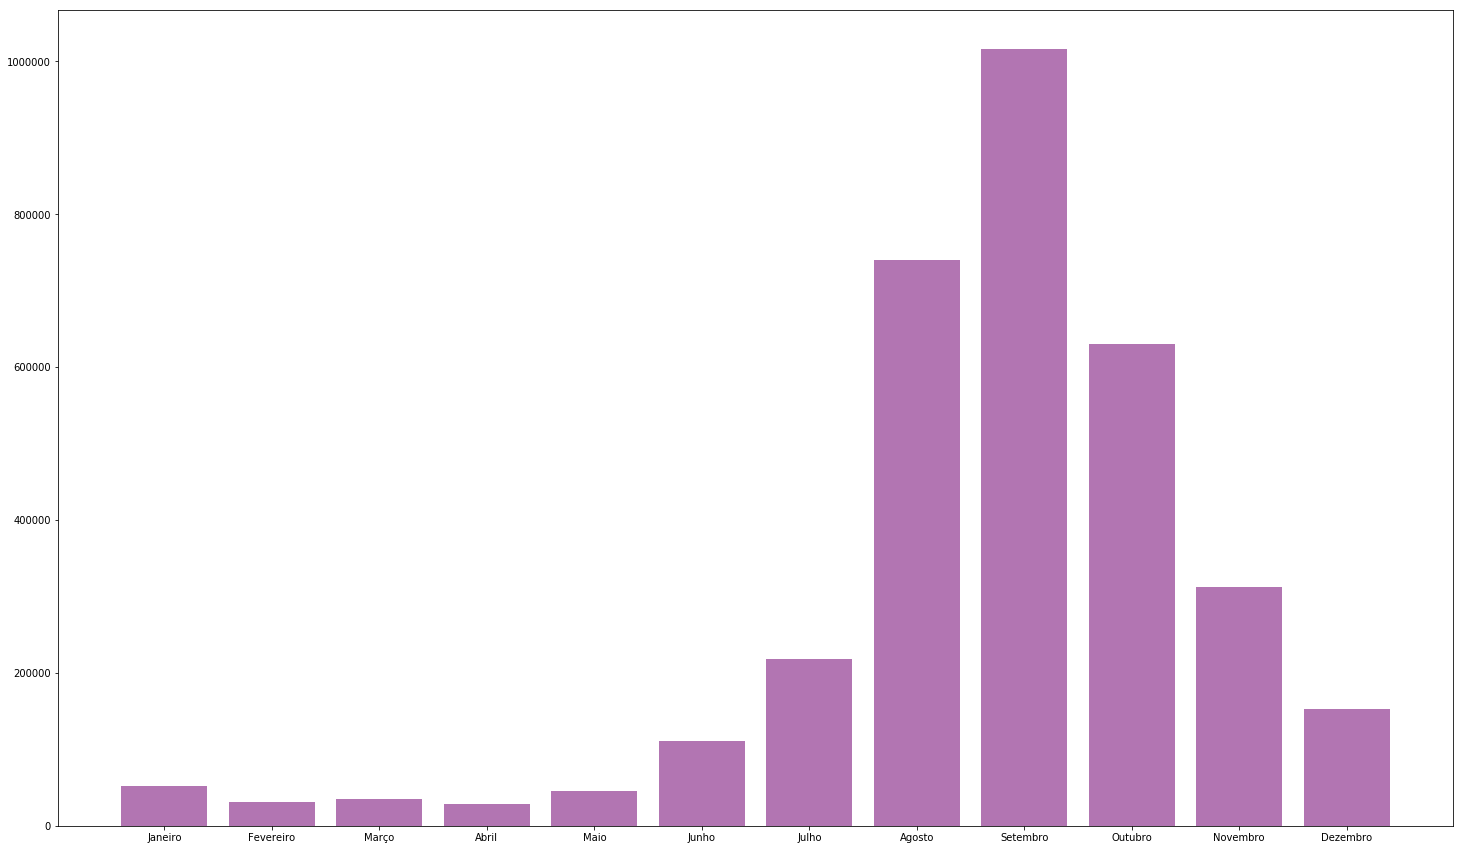

In [71]:
plt.figure(figsize=(25, 15)) #specify width and height
#plt.bar(x-values, y-values)
#plt.bar(forest_fire_per_month['month'], forest_fire_per_month['number'], color= (0.5, 0.1, 0.5, 0.6))


plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 

In [74]:

#use .suptitle for the actual title and .title for the subheading
plt.suptitle('Amazon forest fires over the months', fontsize = 20)
plt.title('Using data from 1998 to 2017', fontsize = 20)
plt.xlabel('Month', fontsize= 20)
plt.ylabel('Number of forest fires', fontsize= 20)

#plt.text(x-coordinate, y-coordinate, valueofText, alignment)
#this adds text at the top of each bar indicating its value

for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(i, num+5000, num, ha='center', fontsize = 15)

#plt.setp is to set a property on an artist object.
#plt.gca() gets the current axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)


[None, None, None, None, None, None, None, None, None, None, None, None]

ValueError: Image size of 3794x221990024 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

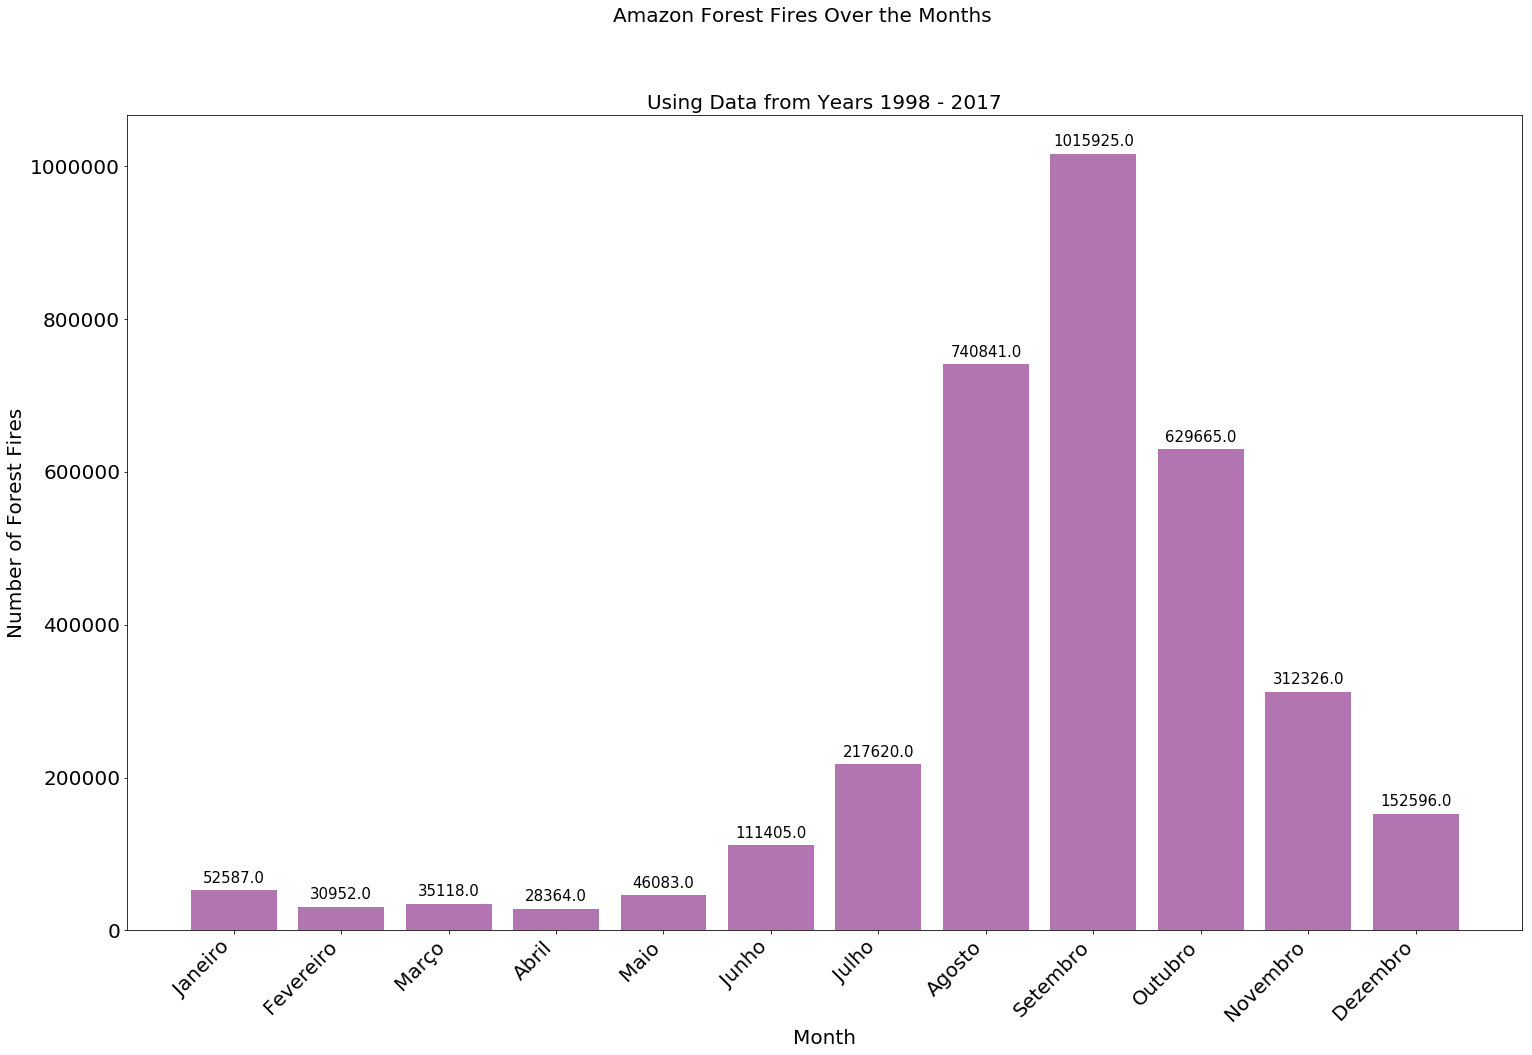

In [70]:
plt.figure(figsize=(25, 15)) #specify width and height 
#plt.bar(x-values, y-values) 
plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 
#use .suptitle for the actual title and .title for the subheading

plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
plt.title('Using Data from Years 1998 - 2017', fontsize=20)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)

#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)   
#plt.setp is to set a property on an artist object.
#plt.gca() gets the current axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)

        month     number
0     Janeiro    52587.0
1   Fevereiro    30952.0
2       Março    35118.0
3       Abril    28364.0
4        Maio    46083.0
5       Junho   111405.0
6       Julho   217620.0
7      Agosto   740841.0
8    Setembro  1015925.0
9     Outubro   629665.0
10   Novembro   312326.0
11   Dezembro   152596.0
